**VISUALIZAÇÃO DA INFORMAÇÃO**

O projeto apresenta gráficos sobre a expectativa de vida mundial, e uma rápida análise com relação o Brasil.

Fonte:
O dataset foi retirado do site Our Word in data, por considerar um site de contúdo confiável.

https://ourworldindata.org/life-expectancy

# 1.   Importando dados
Realizei o download manual do arquivo, pois a estrutura da pagina não dificultou o acesso ao link.



In [36]:
dados = "life-expectancy.csv"

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df = pd.read_csv(dados)

In [39]:
df.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [40]:
new_col_names = {'Life expectancy': 'Life_expectancy'}
df = df.rename(new_col_names, axis = 'columns')
df.head(2)

,Entity,Code,Year,Life_expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878


#2. O primeiro gráfico mostra o progresso da Expectativa de vida de 1950 (ano com dados, mais proximo do final da segunda guerra) e 2019.

Conseguimos ver algum progresso, sabemos que a expectativa máxima era pouco mais do que 70 anos, e que o Brazil aumentou essa expectativa em 25 anos, e o Japão 23 anos dentro desse período.

In [41]:
ano_1950 = df[(df.Year == 1950)]
ano_2019 = df[(df.Year == 2019)]

In [42]:
import plotly as py
import plotly.graph_objs as go

In [43]:
#Dados da  expectativa de vida mundial entre 1950 e 2019
data0 = dict (
  type = 'choropleth',
  locations = ano_1950["Entity"].values,
  locationmode = 'country names',
  colorscale = ['#ff2121','#f75600','#e87900','#d39600','#b9ae00','#99c400','#13e85d'],
  z = ano_1950['Life_expectancy'].values)
map = go.Figure (data=[data0], layout_title_text="Expectativa de vida no mundo em 1950")
map.show()
data1 = dict (
  type = 'choropleth',
  locations = ano_2019["Entity"].values,
  locationmode = 'country names',
  colorscale = ['#ff2121','#f75600','#e87900','#d39600','#b9ae00','#99c400','#13e85d'],
  z = ano_2019['Life_expectancy'].values)
map = go.Figure (data=[data1], layout_title_text="Expectativa de vida no mundo em 2019")
map.show()


#3. Separando os dois paises para análise, podemos ver a progressão de cada um dos países:

Primeiro vamos visualizar os dados de cada país em todo o período:

In [93]:
series = pd.read_csv(dados, header=0, index_col=2, parse_dates=True, squeeze=True)
series = series.rename(new_col_names, axis = 'columns')
brazil = series[(series.Entity == "Brazil")]
japan = series[(series.Entity == "Japan")]

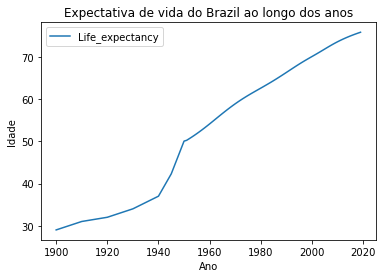

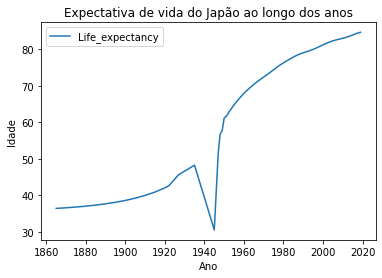

In [75]:
from matplotlib import pyplot
brazil.plot()
plt.title("Expectativa de vida do Brazil ao longo dos anos")
plt.ylabel('Idade')
plt.xlabel('Ano')
japan.plot()
plt.title("Expectativa de vida do Japão ao longo dos anos")
plt.ylabel('Idade')
plt.xlabel('Ano')
pyplot.show()

Agora sobrepostos, para aprimorar o entendimento:

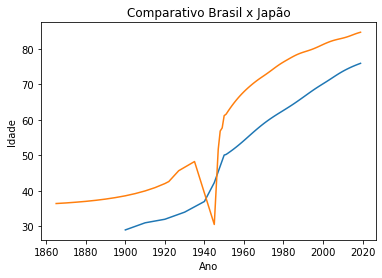

In [85]:
dado1 = brazil['Life_expectancy']
dado2 = japan['Life_expectancy']


plt.plot(dado1)
plt.plot(dado2)
plt.title("Comparativo Brasil x Japão")
plt.ylabel('Idade')
plt.xlabel('Ano')
plt.show()

#4. Com um gráfico de barras conseguimos encontar os países que estão no topo, bem como os que estão por baixo no ranking:

In [86]:
#Uma query para filtrar os países com expectativa maior que 70 anos
top_ano_1950 = ano_1950.query('Life_expectancy > 70')

#Uma query para filtrar os países com expectativa menor que 30 anos
poor_ano_1950 = ano_1950.query('Life_expectancy < 29')

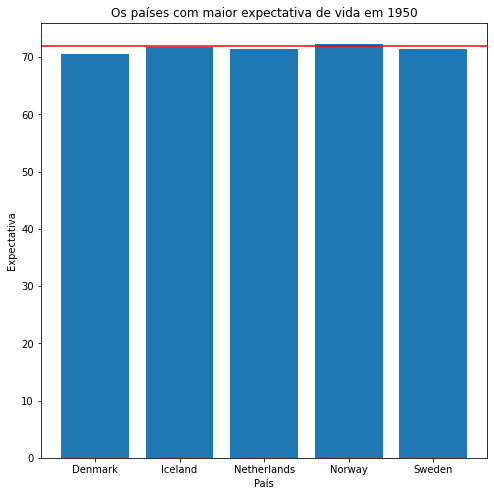

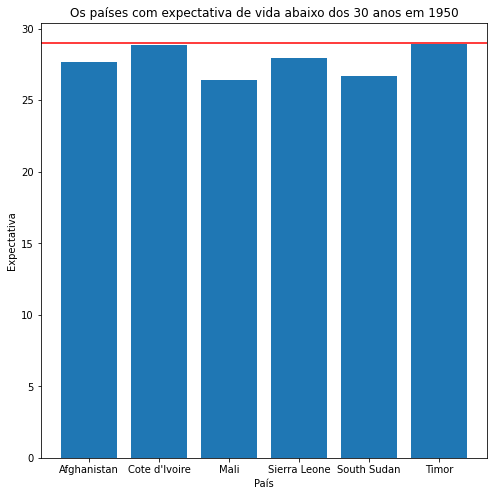

In [87]:
#Arrays para parametrização
paises_top = top_ano_1950["Entity"].values
x1 = top_ano_1950.Entity.values
y1 = top_ano_1950.Life_expectancy.values
paises_poor = poor_ano_1950["Entity"].values
x2 = poor_ano_1950.Entity.values
y2 = poor_ano_1950.Life_expectancy.values

#Criando um gráfico de barras
anos = np.arange(len(paises_top)) #cria o intervalo no eixo x de 0 - n
plt.figure(figsize=(8, 8))
plt.bar(x1,y1, align = "center")
plt.ylabel("Expectativa")
plt.xlabel("País")
plt.title("Os países com maior expectativa de vida em 1950")
plt.axhline(y=72, xmin=0.0, xmax=1.0, color='red')
#Criando um gráfico de barras
anos = np.arange(len(paises_poor)) #cria o intervalo no eixo x de 0 - n
plt.figure(figsize=(8, 8))
plt.bar(x2,y2, align = "center")
plt.ylabel("Expectativa")
plt.xlabel("País")
plt.title("Os países com expectativa de vida abaixo dos 30 anos em 1950")
plt.axhline(y=29, xmin=0.0, xmax=1.0, color='red')
plt.show()

In [89]:
#Uma query para filtrar os países com expectativa maior que 70 anos
top_ano_2019 = ano_2019.query('Life_expectancy > 84')

#Uma query para filtrar os países com expectativa menor que 30 anos
poor_ano_2019 = ano_2019.query('Life_expectancy < 55')

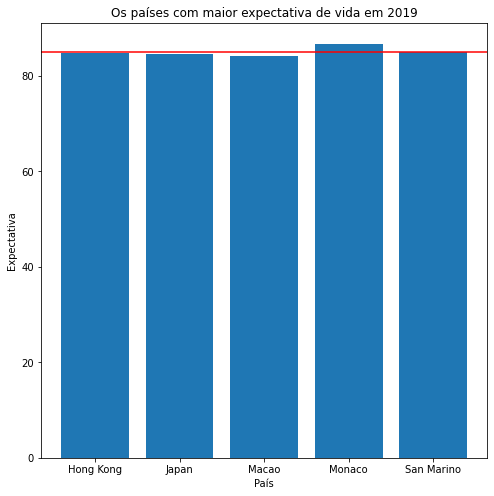

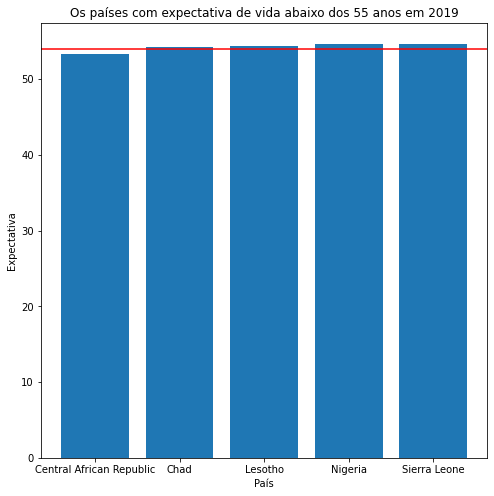

In [90]:
#Arrays para parametrização
paises_top = top_ano_2019["Entity"].values
x1 = top_ano_2019.Entity.values
y1 = top_ano_2019.Life_expectancy.values
paises_poor = poor_ano_2019["Entity"].values
x2 = poor_ano_2019.Entity.values
y2 = poor_ano_2019.Life_expectancy.values

#Criando um gráfico de barras
anos = np.arange(len(paises_top)) #cria o intervalo no eixo x de 0 - n
plt.figure(figsize=(8, 8))
plt.bar(x1,y1, align = "center")
plt.ylabel("Expectativa")
plt.xlabel("País")
plt.title("Os países com maior expectativa de vida em 2019")
plt.axhline(y=85, xmin=0.0, xmax=1.0, color='red')

#Criando um gráfico de barras
anos = np.arange(len(paises_poor)) #cria o intervalo no eixo x de 0 - n
plt.figure(figsize=(8, 8))
plt.bar(x2,y2, align = "center")
plt.ylabel("Expectativa")
plt.xlabel("País")
plt.title("Os países com expectativa de vida abaixo dos 55 anos em 2019")
plt.axhline(y=54, xmin=0.0, xmax=1.0, color='red')
plt.show()

# 5. Usando o Treemap podemos representar a média da expectativa de vida dos continentes entre 1543 e 2019

In [ ]:
pip install --upgrade plotly

In [91]:
#O nome dos continentes filtrados
df['World'] = 'World'
df_temp = df[(df.Code.isna())]
continentes = df_temp['Entity'].unique()
continentes = np.delete(continentes, np.where(continentes == 'Saint Barthlemy') )
continentes = np.delete(continentes, np.where(continentes == 'Americas') )

In [94]:
# cálculo da média da expectativa de vida dos continentes
idade = []
for item in continentes:
  pais_tmp = series[(series.Entity == item)]
  media = pais_tmp['Life_expectancy'].mean()
  idade = np.append(idade,media) #Armazenado na variavel idade
  

In [95]:
import plotly.express as px
import pandas as pd
mundo = ['World','World','World','World','World','World']
selecao = pd.DataFrame(dict(continentes=continentes,mundo=mundo,idade=idade))
fig = px.treemap(selecao, path=[mundo,continentes], values=idade)
fig.show()